Using cPickle to load the dataset

In [1]:
%matplotlib inline
import os,random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as cPickle, random, sys, keras
import scipy
from sklearn import preprocessing
import tensorflow as tf

Xd = cPickle.load(open("RML2016.10b.dat",'rb'), encoding='latin1')


This dataset contains 200 keys, representing different modulation types with differnt Signal to Noise Ratio (SNR). Each modulation type have a variation of 20 different SNR levels ranging from -20 to 18. 

For instance , QPSK :

- (QPSK , -20 )
- (QPSK , -18 )
- (QPSK , -16 )
- (QPSK , -12 )
- (QPSK , -10 )
- (QPSK , -8 )
- (QPSK , -6 )
- (QPSK , -4 )
- (QPSK , -2 )
- (QPSK ,  0 )
- (QPSK ,  2 )
- (QPSK ,  4 )
- (QPSK ,  6 )
- (QPSK ,  8 )
- (QPSK ,  10 )
- (QPSK ,  12 )
- (QPSK ,  14 )
- (QPSK ,  16 )
- (QPSK ,  18 )

In each modulation type with SNR level, it contains 6000 128-Vector IQ samples.

The dimension of each key (Modulation + SNR ) is (6000,2,128)



In [7]:
print('The number of keys in this dataset : {0} keys'.format(len(Xd.keys())))
print("The shape of one modulation (key) is :{0}\n".format(Xd[('QPSK', 2)].shape))
print("This means, Intensity (I) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples")
print("Similary, Quadranture (Q) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples")

The number of keys in this dataset : 200 keys
The shape of one modulation (key) is :(6000, 2, 128)

This means, Intensity (I) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples
Similary, Quadranture (Q) : 6000 IQ Samples of QPSK Modulation with each IQ Samples having 128 samples


In [8]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

In [9]:
print('The number of different Singal-to-Noises of one particular moudlation in this dataset : {0}'.format(len(snrs)))
print(snrs)

The number of different Singal-to-Noises of one particular moudlation in this dataset : 20
[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


In [10]:
print('The number of differents Modulation presents in this dataset : {0} '.format(len(mods)))
print(mods)

The number of differents Modulation presents in this dataset : 10 
['8PSK', 'AM-DSB', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK', 'WBFM']


# BPSK - SNR 18

- Analysing Type of Modulation : BPSK
- SNR value : 18 (Highest SNR among this dataset)

In [385]:
BPSK_18 = Xd[('BPSK',18)]
BPSK_18.shape

(6000, 2, 128)

In [389]:
Intensity_BPSK_18 = BPSK_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_BPSK_18 = BPSK_18[:,1,:]# Taking only First 100 Quadrature

In [390]:
# 8 samples per symbol 
# Assuming it is normalised Hz

# This is an assumption made to due to lack of information.
# Theorecitcally, Symbol rate = Sampling freuqncy / Sample per symbol
# Symbol rate [ Symbol per second ]
Fs = 1/8 # sampling freq

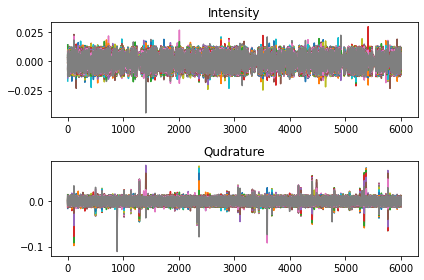

In [391]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_BPSK_18)
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_BPSK_18)
axs[1].set_title('Qudrature')
fig.tight_layout()

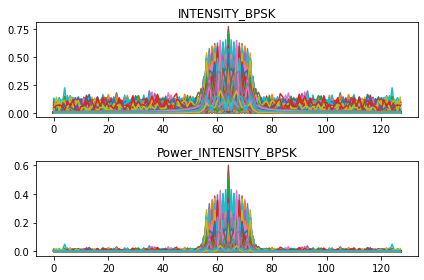

In [431]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_BPSK = abs(np.fft.fftshift(fft(Intensity_BPSK_18[:]-np.mean(Intensity_BPSK_18[:]))))
#end_xf_BPSK=xf_BPSK.shape[1]
#xf_I_BPSK=xf_BPSK[int(end_xf_BPSK/2):end_xf_BPSK]

power_I_BPSK = xf_BPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_BPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_BPSK')

for powerPlot in power_I_BPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_BPSK')

fig.tight_layout()

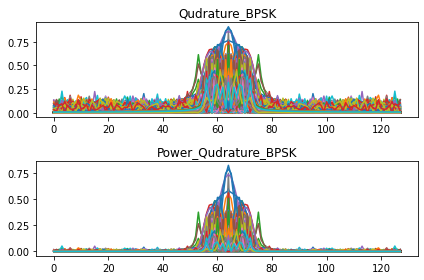

In [432]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_BPSK = abs(np.fft.fftshift(fft(Qudrature_BPSK_18[:]-np.mean(Qudrature_BPSK_18[:]))))

power_Q_BPSK = xf_Q_BPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_BPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_BPSK')

for powerPlot in power_Q_BPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_BPSK')

fig.tight_layout()

(-0.0036005449946969748-0.0015508700162172318j)


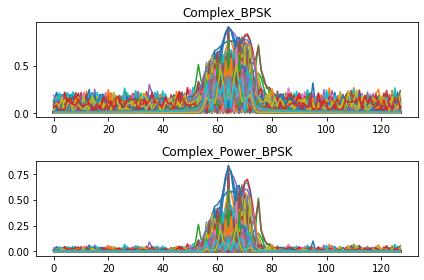

In [397]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
#complex_xD=Xd[MODULATION][:,INTENSITY_AXIS,:]+1j*Xd[MODULATION][:,QUADRATURE_AXIS,:]
complex_num = Intensity_BPSK_18 + 1j*Qudrature_BPSK_18

xf_complex = abs(np.fft.fftshift(fft(complex_num[:]-np.mean(complex_num[:]))))

power_complex = xf_complex **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_BPSK')

for powerPlot in power_complex:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_BPSK')

fig.tight_layout()




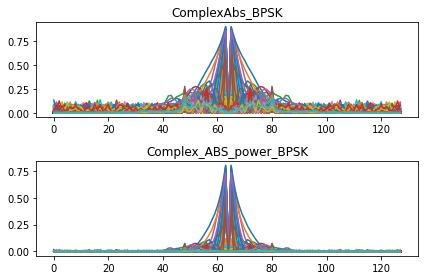

In [396]:
complex_num = Intensity_BPSK_18 + 1j*Qudrature_BPSK_18
abs_complex = abs(complex_num)

xf_complex_abs = abs(np.fft.fftshift(fft(abs_complex[:]-np.mean(abs_complex[:]))))

power_complex_abs = xf_complex_abs **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_abs:
    axs[0].plot(intensityPlot)
axs[0].set_title('ComplexAbs_BPSK')

for powerPlot in power_complex_abs:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_ABS_power_BPSK')

fig.tight_layout()



In [434]:
'''
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
import math

T_bit = 8 
N_psd = 128

I = fft(complex_num)
I_conj = np.conj(I)
I_product = np.multiply(I,I_conj)
fft_shift = np.fft.fftshift(I_product)

db = np.log10( fft_shift )
import matplotlib.pyplot as plt

plt.plot(fft_shift*10)

'''

'\nimport numpy as np\nfrom numpy.fft import *\nimport matplotlib.pyplot as plt\nimport math\n\nT_bit = 8 \nN_psd = 128\n\nI = fft(complex_num)\nI_conj = np.conj(I)\nI_product = np.multiply(I,I_conj)\nfft_shift = np.fft.fftshift(I_product)\n\ndb = np.log10( fft_shift )\nimport matplotlib.pyplot as plt\n\nplt.plot(fft_shift*10)\n\n'

# CPFSK - SNR 18
- Analysing Type of Modulation : CPFSK
- SNR value : 18 (Highest SNR among this dataset)

In [258]:
CPFSK_18 = Xd[('CPFSK',18)]
CPFSK_18.shape

(6000, 2, 128)

In [435]:
Intensity_CPFSK_18 = CPFSK_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_CPFSK_18 = CPFSK_18[:,1,:]# Taking only First 100 Quadrature

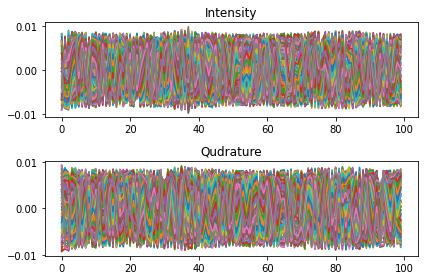

In [437]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_CPFSK_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_CPFSK_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

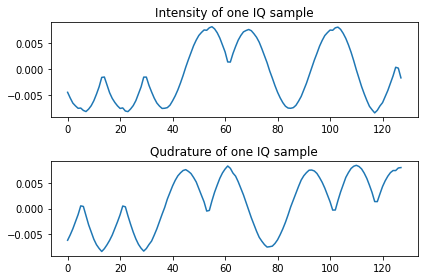

In [261]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_CPFSK_18[99])
axs[0].set_title('Intensity of one IQ sample')

axs[1].plot(Qudrature_CPFSK_18[99])
axs[1].set_title('Qudrature of one IQ sample')
fig.tight_layout()

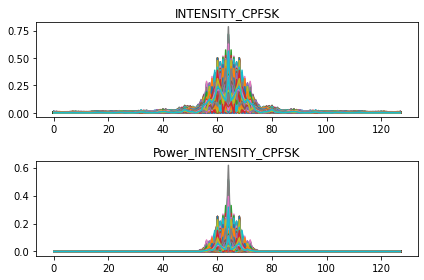

In [439]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_CPFSK = abs(np.fft.fftshift(fft(Intensity_CPFSK_18[:]-np.mean(Intensity_CPFSK_18[:]))))
power_I_CPFSK = xf_CPFSK**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_CPFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_CPFSK')

for powerPlot in power_I_CPFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_CPFSK')

fig.tight_layout()

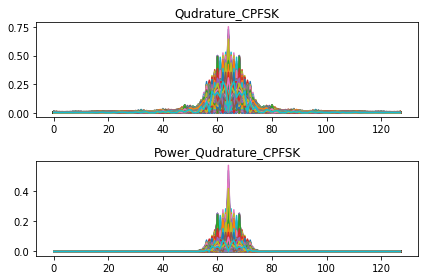

In [441]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_CPFSK = abs(np.fft.fftshift(fft(Qudrature_CPFSK_18[:]-np.mean(Qudrature_CPFSK_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_CPFSK = xf_Q_CPFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_CPFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_CPFSK')

for powerPlot in power_Q_CPFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_CPFSK')

fig.tight_layout()

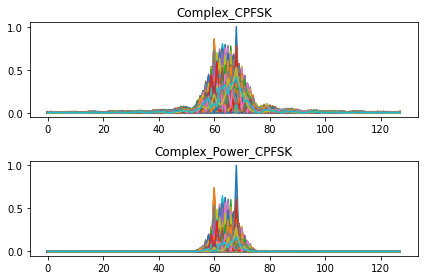

In [442]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_CPFSK = Intensity_CPFSK_18 + 1j*Qudrature_CPFSK_18

xf_complex_CPFSK = abs(np.fft.fftshift(fft(complex_num_CPFSK[:]-np.mean(complex_num_CPFSK[:]))))

power_complex_CPFSK = xf_complex_CPFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_CPFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_CPFSK')

for powerPlot in power_complex_CPFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_CPFSK')

fig.tight_layout()


(array([8.12247346e-10, 8.23492648e-10, 8.27034568e-10, 7.51939018e-10,
        5.41228455e-10, 2.39142327e-10, 5.83017186e-11, 2.63405175e-10,
        8.64161719e-10, 1.52105074e-09, 1.91541603e-09, 2.12107877e-09,
        2.48371972e-09, 3.22515720e-09, 4.21850297e-09, 5.03633158e-09,
        5.19011585e-09, 4.45335668e-09, 3.06920061e-09, 1.63378023e-09,
        6.70098936e-10, 2.76661068e-10, 3.27526822e-10, 1.30742256e-09,
        5.77401546e-09, 2.12813054e-08, 6.58684960e-08, 1.74764753e-07,
        4.03452171e-07, 8.22877838e-07, 1.50848600e-06, 2.52958221e-06,
        3.94439699e-06, 5.80164348e-06, 8.14519244e-06, 1.10155258e-05,
        1.44422017e-05, 1.84287090e-05, 2.29405882e-05, 2.79088382e-05,
        3.32490136e-05, 3.88817874e-05, 4.47371773e-05, 5.07351660e-05,
        5.67520582e-05, 6.25954563e-05, 6.80135581e-05, 7.27500278e-05,
        7.66258147e-05, 7.96017359e-05, 8.17769028e-05, 8.33183184e-05,
        8.43704922e-05, 8.50151538e-05, 8.53167898e-05, 8.542227

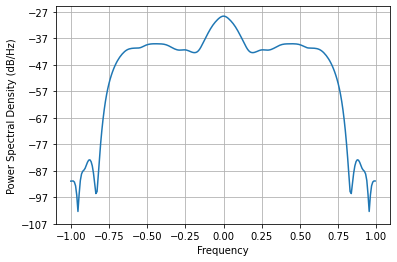

In [263]:
complex_num_CPFSK = Intensity_CPFSK_18 + 1j*Qudrature_CPFSK_18
fft_CPFSK_18 = fft(complex_num_CPFSK)
fft_conj_CPFSK_18 = np.conj(fft_CPFSK_18)
abs_fft_conj_of_CPFSK_18 = np.multiply(fft_CPFSK_18,fft_conj_CPFSK_18)
CPFSK_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_CPFSK_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(CPFSK_18_fft_shift) #The power spectral density Pxx by Welch's average periodogram method. 


# PAM4 - SNR 18
- Analysing Type of Modulation : PAM4
- SNR value : 18 (Highest SNR among this dataset)

In [443]:
PAM4_18 = Xd[('PAM4',18)]
PAM4_18.shape

(6000, 2, 128)

In [444]:
Intensity_PAM4_18 = PAM4_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_PAM4_18 = PAM4_18[:,1,:]# Taking only First 100 Quadrature

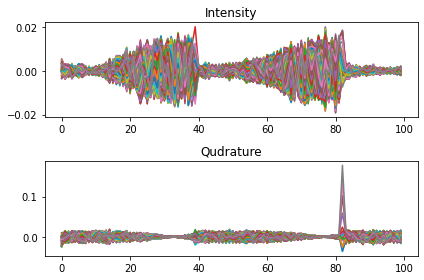

In [445]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_PAM4_18[0:100])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_PAM4_18[0:100])
axs[1].set_title('Qudrature')
fig.tight_layout()

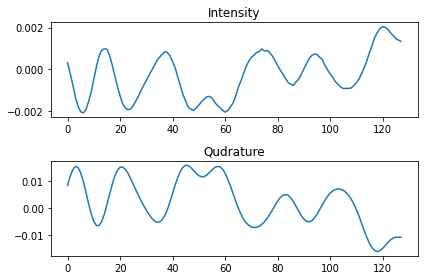

In [446]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)
axs[0].plot(Intensity_PAM4_18[99])
axs[0].set_title('Intensity')

axs[1].plot(Qudrature_PAM4_18[99])
axs[1].set_title('Qudrature')
fig.tight_layout()

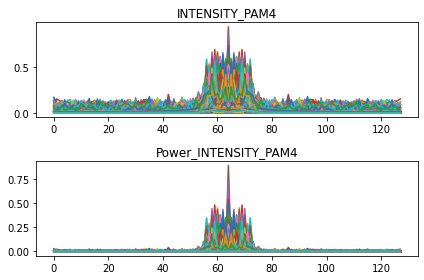

In [447]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_PAM4 = abs(np.fft.fftshift(fft(Intensity_PAM4_18[:]-np.mean(Intensity_PAM4_18[:]))))
power_I_PAM4 = xf_PAM4**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_PAM4:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_PAM4')

for powerPlot in power_I_PAM4:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_PAM4')

fig.tight_layout()

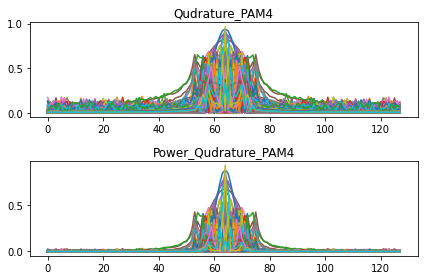

In [449]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_PAM4 = abs(np.fft.fftshift(fft(Qudrature_PAM4_18[:]-np.mean(Qudrature_PAM4_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_PAM4 = xf_Q_PAM4 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_PAM4:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_PAM4')

for powerPlot in power_Q_PAM4:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_PAM4')

fig.tight_layout()

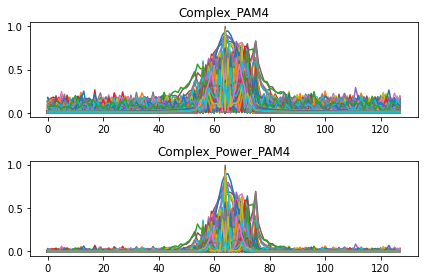

In [450]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_PAM4 = Intensity_PAM4_18 + 1j*Qudrature_PAM4_18

xf_complex_PAM4 = abs(np.fft.fftshift(fft(complex_num_PAM4[:]-np.mean(complex_num_PAM4[:]))))

power_complex_PAM4 = xf_complex_PAM4 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_PAM4:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_PAM4')

for powerPlot in power_complex_PAM4:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_PAM4')

fig.tight_layout()

Text(0.5, 1.0, 'PAM4_18')

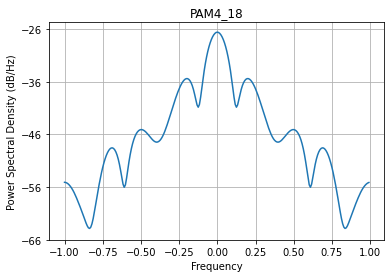

In [345]:
complex_num_PAM4 = Intensity_PAM4_18 + 1j*Qudrature_PAM4_18

fft_PAM4_18 = fft(complex_num_PAM4)
fft_conj_PAM4_18 = np.conj(fft_PAM4_18)
abs_fft_conj_of_PAM4_18 = np.multiply(fft_PAM4_18,fft_conj_PAM4_18)
PAM4_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_PAM4_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(PAM4_18_fft_shift) #The power spectral density Pxx by Welch's average periodogram method. 
plt.title('PAM4_18')


# QAM16 - SNR 18

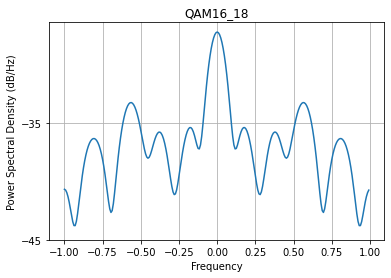

In [459]:
QAM16_18 = Xd[('QAM16',18)]
QAM16_18.shape

Intensity_QAM16_18_100 = QAM16_18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_QAM16_18_100 = QAM16_18[0:100,1,:]# Taking only First 100 Quadrature

complex_num_QAM16_18 = Intensity_QAM16_18_100 + 1j*Qudrature_QAM16_18_100

fft_QAM16_18 = fft(complex_num_QAM16_18)
fft_conj_QAM16_18= np.conj(fft_QAM16_18)
abs_fft_conj_of_QAM16_18 = np.multiply(fft_QAM16_18,fft_conj_QAM16_18)
QAM16_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_QAM16_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(QAM16_18_fft_shift)
plt.title('QAM16_18')
fig.tight_layout()

In [460]:
Intensity_QAM16_18 = QAM16_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_QAM16_18 = QAM16_18[:,1,:]# Taking only First 100 Quadrature

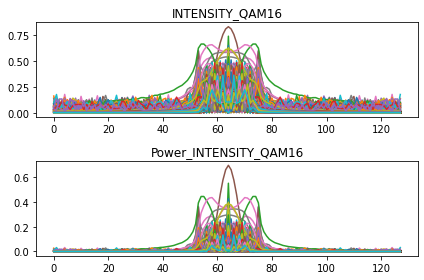

In [462]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_QAM16 = abs(np.fft.fftshift(fft(Intensity_QAM16_18[:]-np.mean(Intensity_QAM16_18[:]))))
power_I_QAM16 = xf_QAM16**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_QAM16:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_QAM16')

for powerPlot in power_I_QAM16:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_QAM16')

fig.tight_layout()


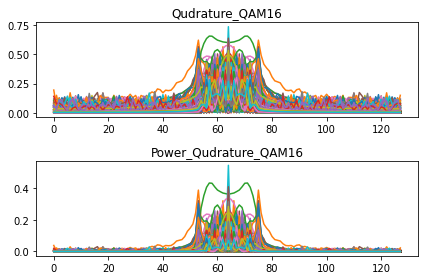

In [463]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_QAM16 = abs(np.fft.fftshift(fft(Qudrature_QAM16_18[:]-np.mean(Qudrature_QAM16_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_QAM16 = xf_Q_QAM16 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_QAM16:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_QAM16')

for powerPlot in power_Q_QAM16:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_QAM16')

fig.tight_layout()


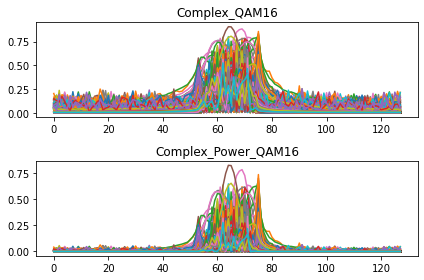

In [464]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_QAM16 = Intensity_QAM16_18 + 1j*Qudrature_QAM16_18

xf_complex_QAM16 = abs(np.fft.fftshift(fft(complex_num_QAM16[:]-np.mean(complex_num_QAM16[:]))))

power_complex_QAM16 = xf_complex_QAM16 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_QAM16:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_QAM16')

for powerPlot in power_complex_QAM16:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_QAM16')

fig.tight_layout()


# QPSK - SNR 18

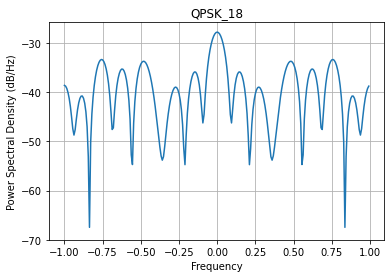

In [457]:
QPSK_18 = Xd[('QPSK',18)]
QPSK_18.shape

Intensity_QPSK_18_100 = QPSK_18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_QPSK_18_100= QPSK_18[0:100,1,:]# Taking only First 100 Quadrature

complex_num_QPSK_18 = Intensity_QPSK_18_100 + 1j*Qudrature_QPSK_18_100

fft_QPSK_18 = fft(complex_num_QPSK_18)
fft_conj_QPSK_18 = np.conj(fft_QPSK_18)
abs_fft_conj_of_QPSK_18 = np.multiply(fft_QPSK_18,fft_conj_QPSK_18)
QPSK_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_QPSK_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(QPSK_18_fft_shift)
plt.title('QPSK_18')
fig.tight_layout()#The power spectral density Pxx by Welch's average periodogram method. 

In [465]:
Intensity_QPSK_18 = QPSK_18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_QPSK_18= QPSK_18[0:100,1,:]

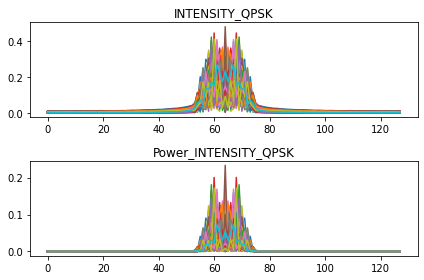

In [466]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_QPSK= abs(np.fft.fftshift(fft(Intensity_QPSK_18[:]-np.mean(Intensity_QPSK_18[:]))))
power_I_QPSK = xf_QPSK**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_QPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_QPSK')

for powerPlot in power_I_QPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_QPSK')

fig.tight_layout()


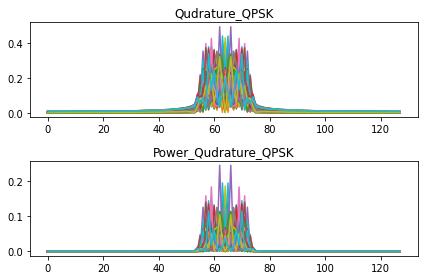

In [467]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_QPSK = abs(np.fft.fftshift(fft(Qudrature_QPSK_18[:]-np.mean(Qudrature_QPSK_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_QPSK = xf_Q_QPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_QPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_QPSK')

for powerPlot in power_Q_QPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_QPSK')

fig.tight_layout()


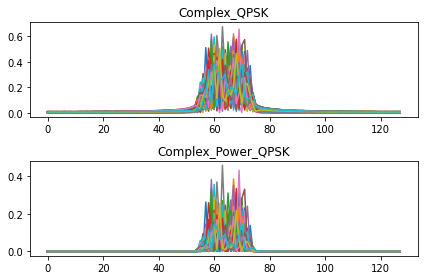

In [468]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_QPSK = Intensity_QPSK_18 + 1j*Qudrature_QPSK_18

xf_complex_QPSK = abs(np.fft.fftshift(fft(complex_num_QPSK[:]-np.mean(complex_num_QPSK[:]))))

power_complex_QPSK = xf_complex_QPSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_QPSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_QPSK')

for powerPlot in power_complex_QPSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_QPSK')

fig.tight_layout()


# GFSK - SNR 18

NameError: name 'fig' is not defined

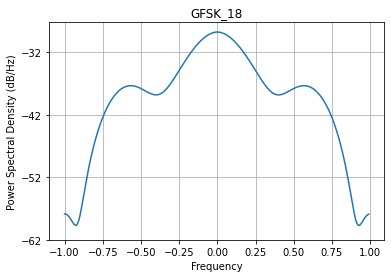

In [13]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

GFSK_18 = Xd[('GFSK',18)]
GFSK_18.shape

Intensity_GFSK_18_100 = GFSK_18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_GFSK_18_100= GFSK_18[0:100,1,:]# Taking only First 100 Quadrature

complex_num_GFSK_18 = Intensity_GFSK_18_100 + 1j*Qudrature_GFSK_18_100

fft_GFSK_18 = fft(complex_num_GFSK_18)
fft_conj_GFSK_18 = np.conj(fft_GFSK_18)
abs_fft_conj_of_GFSK_18 = np.multiply(fft_GFSK_18,fft_conj_GFSK_18)
GFSK_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_GFSK_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(GFSK_18_fft_shift)#The power spectral density Pxx by Welch's average periodogram method. 
plt.title('GFSK_18')
fig.tight_layout()

In [14]:
Intensity_GFSK_18 = GFSK_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_GFSK_18= GFSK_18[:,1,:]# Taking only First 100 Quadrature


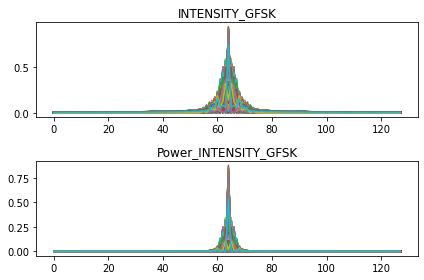

In [15]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_GFSK = abs(np.fft.fftshift(fft(Intensity_GFSK_18[:]-np.mean(Intensity_GFSK_18[:]))))
power_I_GFSK = xf_GFSK**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_GFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_GFSK')

for powerPlot in power_I_GFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_GFSK')

fig.tight_layout()



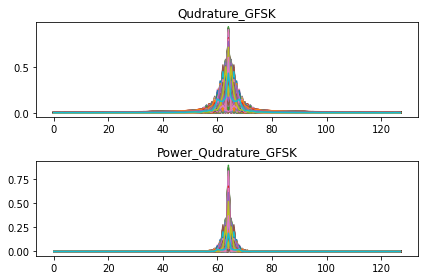

In [16]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_GFSK = abs(np.fft.fftshift(fft(Qudrature_GFSK_18[:]-np.mean(Qudrature_GFSK_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_GFSK = xf_Q_GFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_GFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_GFSK')

for powerPlot in power_Q_GFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_GFSK')

fig.tight_layout()




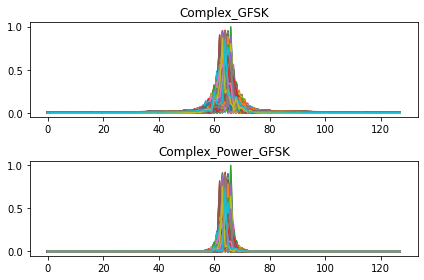

In [18]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_GFSK = Intensity_GFSK_18 + 1j*Qudrature_GFSK_18

xf_complex_GFSK = abs(np.fft.fftshift(fft(complex_num_GFSK[:]-np.mean(complex_num_GFSK[:]))))

power_complex_GFSK = xf_complex_GFSK **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_GFSK:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_GFSK')

for powerPlot in power_complex_GFSK:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_GFSK')

fig.tight_layout()


# AM-DSB - SNR 18

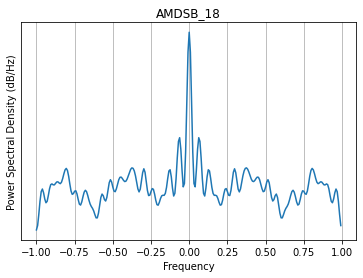

In [326]:
AMDSB_18 = Xd[('AM-DSB',18)]
AMDSB_18.shape

Intensity_AMDSB_18_100 = AMDSB_18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_AMDSB_18_100= AMDSB_18[0:100,1,:]# Taking only First 100 Quadrature

complex_num_AMDSB_18 = Intensity_AMDSB_18_100 + 1j*Qudrature_AMDSB_18_100

fft_AMDSB_18 = fft(complex_num_AMDSB_18)
fft_conj_AMDSB_18 = np.conj(fft_AMDSB_18)
abs_fft_conj_of_AMDSB_18 = np.multiply(fft_AMDSB_18,fft_conj_AMDSB_18)
AMDSB_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_AMDSB_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(AMDSB_18_fft_shift)#The power spectral density Pxx by Welch's average periodogram method. 
plt.title('AMDSB_18')
fig.tight_layout()

In [23]:
AMDSB_18 = Xd[('AM-DSB',18)]
AMDSB_18.shape
Intensity_AMDSB_18 = AMDSB_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_AMDSB_18= AMDSB_18[:,1,:]# Taking only First 100 Quadrature


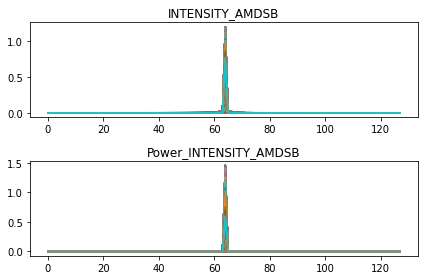

In [24]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_AMDSB= abs(np.fft.fftshift(fft(Intensity_AMDSB_18[:]-np.mean(Intensity_AMDSB_18[:]))))
power_I_AMDSB = xf_AMDSB**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_AMDSB:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_AMDSB')

for powerPlot in power_I_AMDSB:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_AMDSB')

fig.tight_layout()


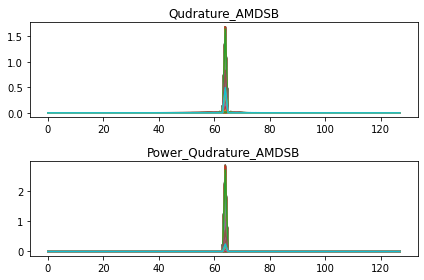

In [25]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_AMDSB= abs(np.fft.fftshift(fft(Qudrature_AMDSB_18[:]-np.mean(Qudrature_AMDSB_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_AMDSB = xf_Q_AMDSB **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_AMDSB:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_AMDSB')

for powerPlot in power_Q_AMDSB:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_AMDSB')

fig.tight_layout()





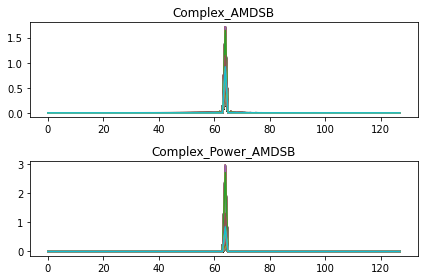

In [26]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_AMDSB = Intensity_AMDSB_18 + 1j*Qudrature_AMDSB_18

xf_complex_AMDSB = abs(np.fft.fftshift(fft(complex_num_AMDSB[:]-np.mean(complex_num_AMDSB[:]))))

power_complex_AMDSB = xf_complex_AMDSB **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_AMDSB:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_AMDSB')

for powerPlot in power_complex_AMDSB:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_AMDSB')

fig.tight_layout()


# WBFM - SNR 18

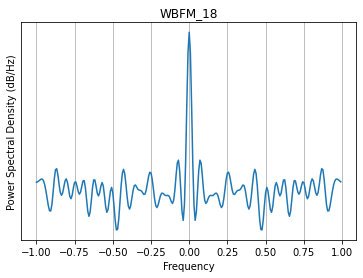

In [327]:
WBFM_18 = Xd[('WBFM',18)]
WBFM_18.shape

Intensity_WBFM_18_100 = WBFM_18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_WBFM_18_100= WBFM_18[0:100,1,:]# Taking only First 100 Quadrature

complex_num_WBFM_18 = Intensity_WBFM_18 + 1j*Qudrature_WBFM_18

fft_WBFM_18 = fft(complex_num_WBFM_18)
fft_conj_WBFM_18 = np.conj(fft_WBFM_18)
abs_fft_conj_of_WBFM_18 = np.multiply(fft_WBFM_18,fft_conj_WBFM_18)
WBFM_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_WBFM_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(WBFM_18_fft_shift)#The power spectral density Pxx by Welch's average periodogram method. 
plt.title('WBFM_18')
fig.tight_layout()

In [27]:
WBFM_18 = Xd[('WBFM',18)]
WBFM_18.shape

Intensity_WBFM_18 = WBFM_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_WBFM_18 = WBFM_18[:,1,:]# Taking only First 100 Quadrature

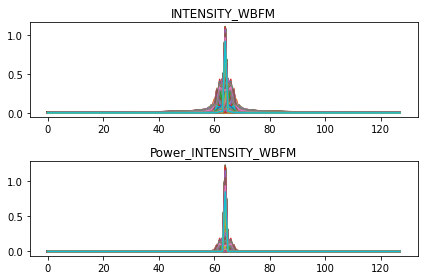

In [28]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_WBFM = abs(np.fft.fftshift(fft(Intensity_WBFM_18[:]-np.mean(Intensity_WBFM_18[:]))))
power_I_WBFM = xf_WBFM**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_WBFM:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_WBFM')

for powerPlot in power_I_WBFM:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_WBFM')

fig.tight_layout()


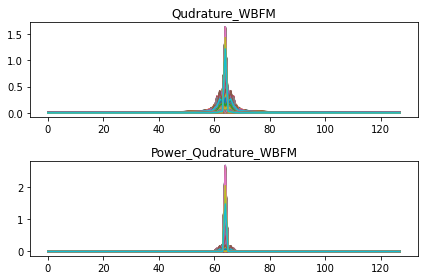

In [29]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_WBFM = abs(np.fft.fftshift(fft(Qudrature_WBFM_18[:]-np.mean(Qudrature_WBFM_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_WBFM= xf_Q_WBFM **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_WBFM:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_WBFM')

for powerPlot in power_Q_WBFM:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_WBFM')

fig.tight_layout()


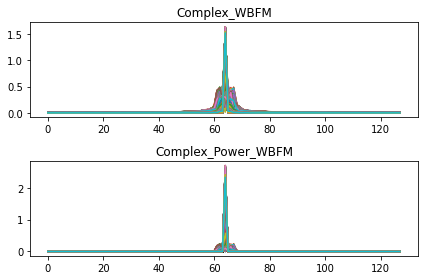

In [30]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_WBFM = Intensity_WBFM_18 + 1j*Qudrature_WBFM_18

xf_complex_WBFM = abs(np.fft.fftshift(fft(complex_num_WBFM[:]-np.mean(complex_num_WBFM[:]))))

power_complex_WBFM = xf_complex_WBFM **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_WBFM:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_WBFM')

for powerPlot in power_complex_WBFM:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_WBFM')

fig.tight_layout()


# 8PSK - SNR 18

In [32]:
PSK8_18 = Xd[('8PSK',18)]
PSK8_18.shape

Intensity_PSK8_18= PSK8_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_PSK8_18 = PSK8_18[:,1,:]# Taking only First 100 Quadrature

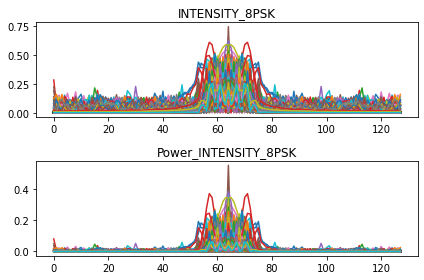

In [36]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_PSK8 = abs(np.fft.fftshift(fft(Intensity_PSK8_18[:]-np.mean(Intensity_PSK8_18[:]))))
power_I_PSK8 = xf_PSK8**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_PSK8:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_8PSK')

for powerPlot in power_I_PSK8:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_8PSK')

fig.tight_layout()


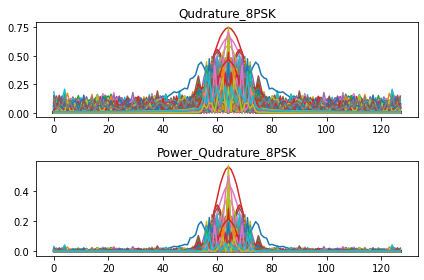

In [37]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_PSK8 = abs(np.fft.fftshift(fft(Qudrature_PSK8_18[:]-np.mean(Qudrature_PSK8_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_PSK8 = xf_Q_PSK8 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_PSK8:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_8PSK')

for powerPlot in power_Q_PSK8:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_8PSK')

fig.tight_layout()


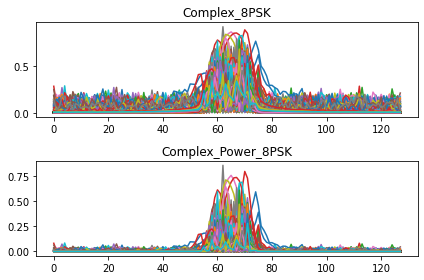

In [38]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_PSK8 = Intensity_PSK8_18 + 1j*Qudrature_PSK8_18

xf_complex_PSK8 = abs(np.fft.fftshift(fft(complex_num_PSK8[:]-np.mean(complex_num_PSK8[:]))))

power_complex_PSK8= xf_complex_PSK8 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_PSK8:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_8PSK')

for powerPlot in power_complex_PSK8:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_8PSK')

fig.tight_layout()


# QAM64 - SNR 18

In [40]:
QAM64_18 = Xd[('QAM64',18)]
QAM64_18.shape

Intensity_QAM64_18= QAM64_18[:,0,:] #Taking only First 100 Intensity  
Qudrature_QAM64_18 = QAM64_18[:,1,:]# Taking only First 100 Quadrature

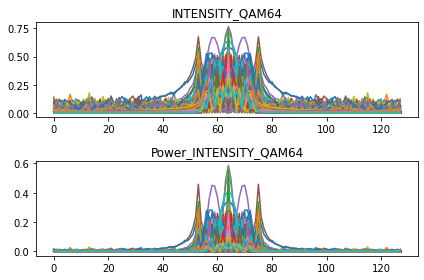

In [41]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_QAM64 = abs(np.fft.fftshift(fft(Intensity_QAM64_18[:]-np.mean(Intensity_QAM64_18[:]))))
power_I_QAM64 = xf_QAM64**2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_QAM64:
    axs[0].plot(intensityPlot)
axs[0].set_title('INTENSITY_QAM64')

for powerPlot in power_I_QAM64:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_INTENSITY_QAM64')

fig.tight_layout()

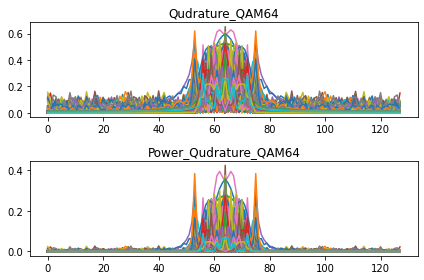

In [42]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt

xf_Q_QAM64 = abs(np.fft.fftshift(fft(Qudrature_QAM64_18[:]-np.mean(Qudrature_QAM64_18[:]))))
#end_xf_Q_BPSK=xf_Q_BPSK.shape[1]
#xf_Q_BPSK_positive=xf_Q_BPSK[int(end_xf_Q_BPSK/2):end_xf_Q_BPSK] #Taking the positive spectrum only
power_Q_QAM64= xf_Q_QAM64 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_Q_QAM64:
    axs[0].plot(intensityPlot)
axs[0].set_title('Qudrature_QAM64')

for powerPlot in power_Q_QAM64:
    axs[1].plot(powerPlot)
axs[1].set_title('Power_Qudrature_QAM64')

fig.tight_layout()

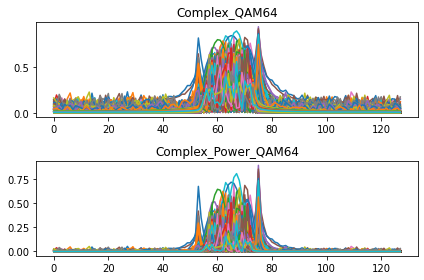

In [44]:
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt
complex_num_QAM64 = Intensity_QAM64_18 + 1j*Qudrature_QAM64_18

xf_complex_QAM64 = abs(np.fft.fftshift(fft(complex_num_QAM64[:]-np.mean(complex_num_QAM64[:]))))

power_complex_QAM64= xf_complex_QAM64 **2 

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2)

for intensityPlot in xf_complex_QAM64:
    axs[0].plot(intensityPlot)
axs[0].set_title('Complex_QAM64')

for powerPlot in power_complex_QAM64:
    axs[1].plot(powerPlot)
axs[1].set_title('Complex_Power_QAM64')
fig.tight_layout()


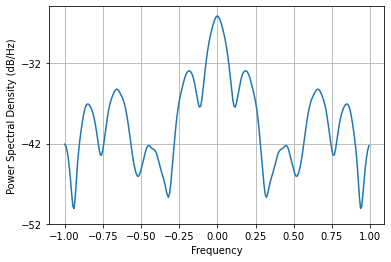

In [45]:
PAM4_0 = Xd[('PAM4',0)]
PAM4_0.shape

Intensity_PAM4_0 = PAM4_0[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_PAM4_0 = PAM4_0[0:100,1,:]# Taking only First 100 Quadrature

complex_num_PAM4_0 = Intensity_PAM4_0 + 1j*Qudrature_PAM4_0

fft_PAM4_0 = fft(complex_num_PAM4_0)
fft_conj_PAM4_0 = np.conj(fft_PAM4_0)
abs_fft_conj_of_PAM4_0 = np.multiply(fft_PAM4_0,fft_conj_PAM4_0)
PAM4_0_fft_shift = np.fft.fftshift(abs_fft_conj_of_PAM4_0)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(PAM4_0_fft_shift) #The power spectral density Pxx by Welch's average periodogram method. 
fig.tight_layout()


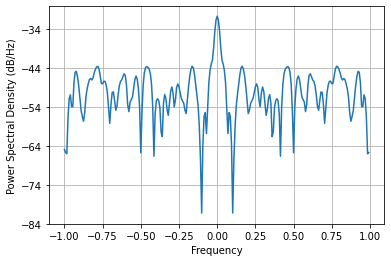

In [46]:
PAM4_N18 = Xd[('PAM4',-18)]
PAM4_N18.shape

Intensity_NPAM4_18 = PAM4_N18[0:100,0,:] #Taking only First 100 Intensity  
Qudrature_NPAM4_18 = PAM4_N18[0:100,1,:]# Taking only First 100 Quadrature

complex_num_NPAM4 = Intensity_NPAM4_18 + 1j*Qudrature_NPAM4_18

fft_NPAM4_18 = fft(complex_num_NPAM4)
fft_conj_NPAM4_18 = np.conj(fft_NPAM4_18)
abs_fft_conj_of_NPAM4_18 = np.multiply(fft_NPAM4_18,fft_conj_NPAM4_18)
NPAM4_18_fft_shift = np.fft.fftshift(abs_fft_conj_of_NPAM4_18)


import matplotlib.pyplot as plt
import matplotlib.mlab
matplotlib.pyplot.psd(NPAM4_18_fft_shift) #The power spectral density Pxx by Welch's average periodogram method.
fig.tight_layout()

